<a href="https://colab.research.google.com/github/sakshik0524/Encryptix_task4/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [1]:
!pip install pandas numpy scikit-learn seaborn matplotlib joblib


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Define the path to the dataset in Google Drive
data_path = '/content/drive/My Drive/spam.csv'

# Load the dataset with a different encoding
data = pd.read_csv(data_path, encoding='latin1')

# Inspect the first few rows of the dataset
print(data.head())

# Check the structure of the dataset
print(data.info())

print(data.shape)

print(data.describe())
data.duplicated().sum()

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

403

[]

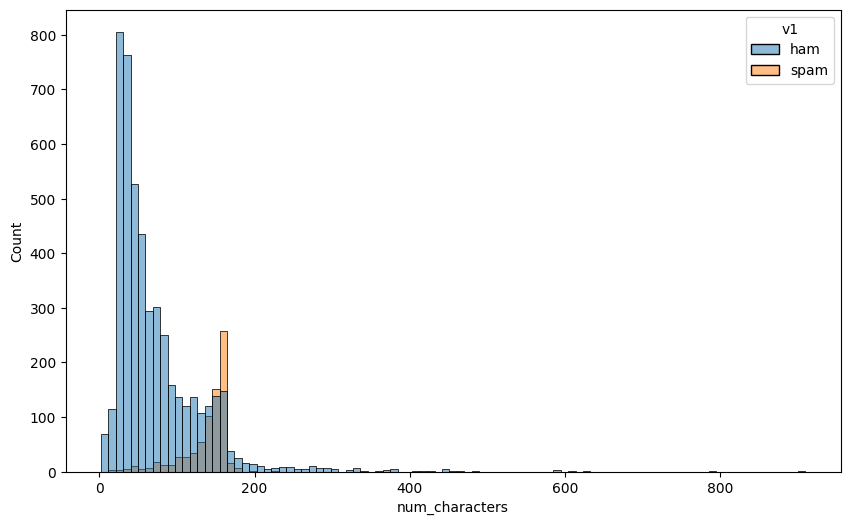

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'num_characters' is a feature you want to analyze,
# you need to create this column first if it doesn't exist.
# Example:
data['num_characters'] = data['v2'].apply(len) # Assuming 'v2' is your text column

plt.figure(figsize=(10,6))
# Check the actual column name for the target variable in your dataframe
# and replace 'v1' if necessary
sns.histplot(data=data,x='num_characters',hue='v1')
plt.plot()

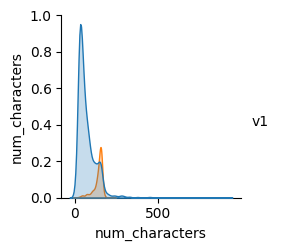

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame you loaded earlier
sns.pairplot(data, hue='v1')
plt.show()

# Value Mapping

In [7]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Map labels to binary values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check for any missing values
print(data.isnull().sum())


label      0
message    0
dtype: int64


<ipython-input-7-e6522f95e9f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


# Data Training

In [8]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Naive Bayes, Logistic Regression and Support Vector Machines to identify the spam messages

In [9]:
# Initialize classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svm_classifier = SVC(kernel='linear')

# Train Naive Bayes classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Train Logistic Regression classifier
lr_classifier.fit(X_train_tfidf, y_train)

# Train SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

# Predictions using all three classifiers

In [10]:
# Make predictions with each classifier
nb_predictions = nb_classifier.predict(X_test_tfidf)
lr_predictions = lr_classifier.predict(X_test_tfidf)
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Define a function to evaluate the models
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Evaluate Naive Bayes classifier
nb_results = evaluate_model(nb_predictions, y_test)
print(f'Naive Bayes - Accuracy: {nb_results[0]}, Precision: {nb_results[1]}, Recall: {nb_results[2]}, F1-Score: {nb_results[3]}')

# Evaluate Logistic Regression classifier
lr_results = evaluate_model(lr_predictions, y_test)
print(f'Logistic Regression - Accuracy: {lr_results[0]}, Precision: {lr_results[1]}, Recall: {lr_results[2]}, F1-Score: {lr_results[3]}')

# Evaluate SVM classifier
svm_results = evaluate_model(svm_predictions, y_test)
print(f'SVM - Accuracy: {svm_results[0]}, Precision: {svm_results[1]}, Recall: {svm_results[2]}, F1-Score: {svm_results[3]}')


Naive Bayes - Accuracy: 0.9668161434977578, Precision: 1.0, Recall: 0.7533333333333333, F1-Score: 0.8593155893536121
Logistic Regression - Accuracy: 0.9524663677130045, Precision: 0.970873786407767, Recall: 0.6666666666666666, F1-Score: 0.7905138339920948
SVM - Accuracy: 0.979372197309417, Precision: 0.9703703703703703, Recall: 0.8733333333333333, F1-Score: 0.9192982456140351


# Hyperparameter tuning for Logistic Regression

In [11]:
# Perform hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters for Logistic Regression:", best_params)

# Create an ensemble of classifiers
voting_clf = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('lr', LogisticRegression(max_iter=1000, C=best_params['C'], solver=best_params['solver'])),
    ('svm', SVC(kernel='linear', probability=True))
], voting='soft')

# Train the ensemble classifier
voting_clf.fit(X_train_tfidf, y_train)

# Make predictions with the ensemble classifier
ensemble_predictions = voting_clf.predict(X_test_tfidf)

# Evaluate the ensemble classifier
ensemble_results = evaluate_model(ensemble_predictions, y_test)
print(f'Ensemble - Accuracy: {ensemble_results[0]}, Precision: {ensemble_results[1]}, Recall: {ensemble_results[2]}, F1-Score: {ensemble_results[3]}')


Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Ensemble - Accuracy: 0.9811659192825112, Precision: 0.9708029197080292, Recall: 0.8866666666666667, F1-Score: 0.926829268292683


# Support vector machines classifier prevails! (final answer)

In [12]:
# Create example messages for prediction
example_messages = [
    "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/12345 to claim now.",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT! Your account has been compromised. Click the link to secure it.",
    "Don't forget to bring your assignment to class.",
    "Get 50% off your next purchase at our store. Limited time offer."
]

# Transform the example messages using the TF-IDF vectorizer
example_messages_tfidf = tfidf_vectorizer.transform(example_messages)

# Make predictions using each classifier
nb_predictions = nb_classifier.predict(example_messages_tfidf)
lr_predictions = lr_classifier.predict(example_messages_tfidf)
svm_predictions = svm_classifier.predict(example_messages_tfidf)
ensemble_predictions = voting_clf.predict(example_messages_tfidf)

# Define a function to map the label to a string for readability
def map_label_to_string(label):
    return 'spam' if label == 1 else 'ham'

# Display the results for the example messages
print("Example Messages Classification:\n")
for i, message in enumerate(example_messages):
    print(f"Message: {message}")
    print(f"Naive Bayes Prediction: {map_label_to_string(nb_predictions[i])}")
    print(f"Logistic Regression Prediction: {map_label_to_string(lr_predictions[i])}")
    print(f"SVM Prediction: {map_label_to_string(svm_predictions[i])}")
    print(f"Ensemble Prediction: {map_label_to_string(ensemble_predictions[i])}")
    print("-" * 60)

Example Messages Classification:

Message: Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/12345 to claim now.
Naive Bayes Prediction: spam
Logistic Regression Prediction: spam
SVM Prediction: spam
Ensemble Prediction: spam
------------------------------------------------------------
Message: Hey, are we still meeting for lunch tomorrow?
Naive Bayes Prediction: ham
Logistic Regression Prediction: ham
SVM Prediction: ham
Ensemble Prediction: ham
------------------------------------------------------------
Message: URGENT! Your account has been compromised. Click the link to secure it.
Naive Bayes Prediction: ham
Logistic Regression Prediction: ham
SVM Prediction: spam
Ensemble Prediction: spam
------------------------------------------------------------
Message: Don't forget to bring your assignment to class.
Naive Bayes Prediction: ham
Logistic Regression Prediction: ham
SVM Prediction: ham
Ensemble Prediction: ham
-------------------------------------------

# Top 10 features influencing LRC

In [13]:
import numpy as np

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the coefficients of the logistic regression model
coef = lr_classifier.coef_.flatten()

# Create a DataFrame for the coefficients and feature names
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort by absolute value of coefficient
coef_df['abs_coefficient'] = np.abs(coef_df['coefficient'])
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Display the top features
print("Top 10 features influencing Logistic Regression predictions:")
print(coef_df.head(10))


Top 10 features influencing Logistic Regression predictions:
      feature  coefficient  abs_coefficient
6838      txt     4.476817         4.476817
4392   mobile     3.797081         3.797081
1775    claim     3.711373         3.711373
2910     free     3.607369         3.607369
7353      www     3.454592         3.454592
6269     stop     3.353968         3.353968
6863       uk     3.245007         3.245007
5520    reply     3.069216         3.069216
529        50     2.986194         2.986194
5821  service     2.951205         2.951205


# Attempts to enhance NBC, LRC

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset in Google Drive
data_path = '/content/drive/My Drive/spam.csv'

# Load the dataset with a different encoding to handle potential encoding issues
data = pd.read_csv(data_path, encoding='latin1')

# Inspect the first few rows of the dataset
print(data.head())

# Check the structure of the dataset
print(data.info())

# Drop unnecessary columns and rename columns for convenience
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Map labels to binary values (ham: 0, spam: 1)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check for any missing values
print(data.isnull().sum())

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svm_classifier = SVC(kernel='linear', probability=True)

# Train Naive Bayes classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Train Logistic Regression classifier
lr_classifier.fit(X_train_tfidf, y_train)

# Train SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions with each classifier
nb_predictions = nb_classifier.predict(X_test_tfidf)
lr_predictions = lr_classifier.predict(X_test_tfidf)
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Define a function to evaluate the models
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Evaluate Naive Bayes classifier
nb_results = evaluate_model(nb_predictions, y_test)
print(f'Naive Bayes - Accuracy: {nb_results[0]}, Precision: {nb_results[1]}, Recall: {nb_results[2]}, F1-Score: {nb_results[3]}')

# Evaluate Logistic Regression classifier
lr_results = evaluate_model(lr_predictions, y_test)
print(f'Logistic Regression - Accuracy: {lr_results[0]}, Precision: {lr_results[1]}, Recall: {lr_results[2]}, F1-Score: {lr_results[3]}')

# Evaluate SVM classifier
svm_results = evaluate_model(svm_predictions, y_test)
print(f'SVM - Accuracy: {svm_results[0]}, Precision: {svm_results[1]}, Recall: {svm_results[2]}, F1-Score: {svm_results[3]}')

# Perform hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],  # Different regularization strengths
    'solver': ['liblinear', 'saga']  # Different solvers
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters for Logistic Regression:", best_params)

# Create an ensemble of classifiers with soft voting
voting_clf = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('lr', LogisticRegression(max_iter=1000, C=best_params['C'], solver=best_params['solver'])),
    ('svm', SVC(kernel='linear', probability=True))
], voting='soft')

# Train the ensemble classifier
voting_clf.fit(X_train_tfidf, y_train)

# Make predictions with the ensemble classifier
ensemble_predictions = voting_clf.predict(X_test_tfidf)

# Evaluate the ensemble classifier
ensemble_results = evaluate_model(ensemble_predictions, y_test)
print(f'Ensemble - Accuracy: {ensemble_results[0]}, Precision: {ensemble_results[1]}, Recall: {ensemble_results[2]}, F1-Score: {ensemble_results[3]}')

# Create example messages for prediction
example_messages = [
    "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/12345 to claim now.",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT! Your account has been compromised. Click the link to secure it.",
    "Don't forget to bring your assignment to class.",
    "Get 50% off your next purchase at our store. Limited time offer."
]

# Transform the example messages using the TF-IDF vectorizer
example_messages_tfidf = tfidf_vectorizer.transform(example_messages)

# Make predictions using each classifier
nb_predictions = nb_classifier.predict(example_messages_tfidf)
lr_predictions = lr_classifier.predict(example_messages_tfidf)
svm_predictions = svm_classifier.predict(example_messages_tfidf)
ensemble_predictions = voting_clf.predict(example_messages_tfidf)

# Define a function to map the label to a string for readability
def map_label_to_string(label):
    return 'spam' if label == 1 else 'ham'

# Display the results for the example messages
print("Example Messages Classification:\n")
for i, message in enumerate(example_messages):
    print(f"Message: {message}")
    print(f"Naive Bayes Prediction: {map_label_to_string(nb_predictions[i])}")
    print(f"Logistic Regression Prediction: {map_label_to_string(lr_predictions[i])}")
    print(f"SVM Prediction: {map_label_to_string(svm_predictions[i])}")
    print(f"Ensemble Prediction: {map_label_to_string(ensemble_predictions[i])}")
    print("-" * 60)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnam

In [15]:
# Import necessary libraries for data balancing and feature engineering
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
from google.colab import drive

# Function to evaluate models
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset in Google Drive
data_path = '/content/drive/My Drive/spam.csv'

# Load the dataset with a different encoding to handle potential encoding issues
data = pd.read_csv(data_path, encoding='latin1')

# Drop unnecessary columns and rename columns for convenience
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Map labels to binary values (ham: 0, spam: 1)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check for any missing values
print(data.isnull().sum())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Function to extract meta-features
def extract_meta_features(text_series):
    return pd.DataFrame({
        'message_length': text_series.apply(len),
        'num_special_chars': text_series.apply(lambda x: sum(not c.isalnum() for c in x)),
        'num_urls': text_series.apply(lambda x: x.count('http'))
    })

# Combine text and meta-features
combined_features = ColumnTransformer([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7, ngram_range=(1, 2)), 'message'),
    ('meta', FunctionTransformer(extract_meta_features, validate=False), 'message')
])

# Transform training and test data
X_train_transformed = combined_features.fit_transform(pd.DataFrame(X_train, columns=['message']))
X_test_transformed = combined_features.transform(pd.DataFrame(X_test, columns=['message']))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_balanced, y_train_balanced)
nb_predictions = nb_classifier.predict(X_test_transformed)
nb_results = evaluate_model(nb_predictions, y_test)
print(f'Naive Bayes - Accuracy: {nb_results[0]}, Precision: {nb_results[1]}, Recall: {nb_results[2]}, F1-Score: {nb_results[3]}')

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_balanced, y_train_balanced)
lr_predictions = lr_classifier.predict(X_test_transformed)
lr_results = evaluate_model(lr_predictions, y_test)
print(f'Logistic Regression - Accuracy: {lr_results[0]}, Precision: {lr_results[1]}, Recall: {lr_results[2]}, F1-Score: {lr_results[3]}')

# Train SVM classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_balanced, y_train_balanced)
svm_predictions = svm_classifier.predict(X_test_transformed)
svm_results = evaluate_model(svm_predictions, y_test)
print(f'SVM - Accuracy: {svm_results[0]}, Precision: {svm_results[1]}, Recall: {svm_results[2]}, F1-Score: {svm_results[3]}')

# Define and train ensemble classifier
voting_clf = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('lr', lr_classifier),
    ('svm', svm_classifier)
], voting='soft')

voting_clf.fit(X_train_balanced, y_train_balanced)
ensemble_predictions = voting_clf.predict(X_test_transformed)
ensemble_results = evaluate_model(ensemble_predictions, y_test)
print(f'Ensemble - Accuracy: {ensemble_results[0]}, Precision: {ensemble_results[1]}, Recall: {ensemble_results[2]}, F1-Score: {ensemble_results[3]}')

# Create example messages for prediction
example_messages = [
    "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/12345 to claim now.",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT! Your account has been compromised. Click the link to secure it.",
    "Don't forget to bring your assignment to class.",
    "Get 50% off your next purchase at our store. Limited time offer."
]

# Transform example messages using the same feature extractor
example_messages_transformed = combined_features.transform(pd.DataFrame(example_messages, columns=['message']))

# Make predictions using the ensemble classifier
example_predictions = voting_clf.predict(example_messages_transformed)

# Define a function to map the label to a string for readability
def map_label_to_string(label):
    return 'spam' if label == 1 else 'ham'

# Display the results for the example messages
print("Example Messages Classification:\n")
for i, message in enumerate(example_messages):
    print(f"Message: {message}")
    print(f"Ensemble Prediction: {map_label_to_string(example_predictions[i])}")
    print("-" * 60)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
label      0
message    0
dtype: int64
Naive Bayes - Accuracy: 0.5811659192825112, Precision: 0.24311183144246354, Recall: 1.0, F1-Score: 0.39113428943937417
Logistic Regression - Accuracy: 0.9524663677130045, Precision: 0.7740112994350282, Recall: 0.9133333333333333, F1-Score: 0.8379204892966361
SVM - Accuracy: 0.8322869955156951, Precision: 0.4401294498381877, Recall: 0.9066666666666666, F1-Score: 0.5925925925925926
Ensemble - Accuracy: 0.8358744394618834, Precision: 0.4482758620689655, Recall: 0.9533333333333334, F1-Score: 0.6098081023454157
Example Messages Classification:

Message: Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/12345 to claim now.
Ensemble Prediction: spam
------------------------------------------------------------
Message: Hey, are we still meeting for lunch tomorrow?
Ensemble Prediction: ham
--------------